<a href="https://colab.research.google.com/github/cpk110/ChatGPT/blob/master/008_%EB%84%A4%EC%9D%B4%EB%B2%84_%ED%81%AC%EB%A1%A4%EB%A7%81_%EC%9A%94%EC%95%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/ai_chatbot_python/ChatGPT'

Mounted at /content/drive
/content/drive/MyDrive/ai_chatbot_python/ChatGPT


In [ ]:
# tiktoken 모듈은 OpenAI 모델에서 사용되기 위해 제작된 BPE 토크나이저입니다.
!pip install  langchain openai==0.28.1  gradio==3.40.1 typing-extensions==4.9.0 langchain tiktoken
# typing-extensions==3.10.0.2

In [ ]:
import os
os.environ['OPENAI_API_KEY'] = 'sk-'

- PromptTemplate : 사용자의 입력 변수를 사용하여 완전한 프롬프트 문자열을 만드는 데 사용되는 템플릿이다.  
- template: 템플릿 문자열입니다. 이 문자열 내에서 중괄호 {}는 변수  
- input_variables: 중괄호 안에 들어갈 변수의 이름을 리스트로 정의  

  ```python
    no_input_prompt = PromptTemplate(
      input_variable=['current'],
      template = '맛있는 {current }하면?'
    )
  ```

  no_input_prompt.format(current='과일')

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import WebBaseLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.chains.summarize import load_summarize_chain
from langchain.prompts import PromptTemplate


# 네이버 뉴스기사 주소
url = 'https://n.news.naver.com/article/016/0002247281?sid=110'

# 웹 문서 크롤링
loader = WebBaseLoader(url)
# print(loader)
# print(type(loader))
# print(dir(loader))
# print(loader.load())

# 뉴스기사의 본문을 Chunk 단위로 쪼갬
# length_function : 청크의 길이를 계산하는 방법,
#                   기본적으로 문자 수만 세지만 여기서는 토큰 카운터를 전달하는 것이 중요
text_splitter = CharacterTextSplitter(
    separator = '\n\n',
    chunk_size = 3000,
    chunk_overlap = 300,
    length_function = len
)
# print(text_splitter)
# print(type(text_splitter))
# print(dir(text_splitter))

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import WebBaseLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.chains.summarize import load_summarize_chain
from langchain.prompts import PromptTemplate


# 네이버 뉴스기사 주소
url = 'https://n.news.naver.com/article/016/0002247281?sid=110'

# 웹 문서 크롤링
loader = WebBaseLoader(url)

# 뉴스기사의 본문을 Chunk 단위로 쪼갬
# length_function : 청크의 길이를 계산하는 방법,
#                   기본적으로 문자 수만 세지만 여기서는 토큰 카운터를 전달하는 것이 중요
text_splitter = CharacterTextSplitter(
    separator = '\n\n',
    chunk_size = 3000,
    chunk_overlap = 300,
    length_function = len
)

# 웹사이트 내용 크롤링 후 Chunk 단위로 분할
docs = loader.load_and_split(text_splitter)

# 각 Chunk 단위의 템플릿
template = '''다음의 내용을 한글로 요약해줘 :

{text}
'''

# 전체 문서 (혹은 전체 Chunk)에 대한 지시(instruct) 정의
combine_template = '''{text}

요약의 결과는 다음의 형식으로 작성해줘 :
제목 : 신문기사의 제목
주요내용 : 한 줄로 요약 된 내용
내용 : 주요내용을 불렛포인트 형식으로 작성
'''

# 템플릿 생성
prompt = PromptTemplate(template = template, input_variables = ['text'])
combine_prompt = PromptTemplate(template = combine_template, input_variables = ['text'])

# LLM 객체 생성
llm = ChatOpenAI(
    temperature = 0, model_name = 'gpt-3.5-turbo'
)

# 요약을 도와주는 load_summarize_chain
chain = load_summarize_chain(
    llm,
    map_prompt = prompt,
    combine_prompt = combine_prompt,
    chain_type = 'map_reduce',
    verbose = False
)

In [ ]:
# 실행결과
print(type(chain.run(docs)))
# print(dir(chain.run(docs)))
# print(chain.run(docs))
print(chain(docs))

<class 'str'>
{'input_documents': [Document(page_content='소액투자자 위해 금투세 폐지? 증권거래세는? [홍길용의 화식열전]\n\n본문 바로가기\n\n\n이전 페이지\n\n\n헤럴드경제\n\n구독\n\n언론사를 구독하면 메인에서 바로 볼 수 있어요!\n\n\n메인 뉴스판에서 헤럴드경제 주요뉴스를  볼 수 있습니다.\n보러가기\n\n\n헤럴드경제 언론사 구독 해지되었습니다.\n\n\n주요뉴스\n숏폼\n정치\n경제\n사회\n생활\n세계\nIT\n사설/칼럼\n신문보기\n랭킹\n\n소액투자자 위해 금투세 폐지? 증권거래세는? [홍길용의 화식열전]\n\n\n입력2024.01.03. 오후 5:36\n\n기사원문\n \n\n\n홍길용 기자\n\n\n홍길용 기자\n\n구독\n구독중\n\n\n구독자\n0\n\n\n응원수\n0\n\n더보기\n\n\n추천\n\n\n쏠쏠정보\n0\n\n\n흥미진진\n0\n\n\n공감백배\n0\n\n\n분석탁월\n0\n\n\n후속강추\n0\n\n\n \n\n댓글\n\n텍스트 음성 변환 서비스 사용하기\n\n성별\n남성\n여성\n\n\n말하기 속도\n느림\n보통\n빠름\n\n이동 통신망을 이용하여 음성을 재생하면 별도의 데이터 통화료가 부과될 수 있습니다.\n본문듣기 시작\n\n닫기\n\n\n \n\n글자 크기 변경하기\n\n가1단계\n작게\n\n\n가2단계\n보통\n\n\n가3단계\n크게\n\n\n가4단계\n아주크게\n\n\n가5단계\n최대크게\n\n\nSNS 보내기\n\n인쇄하기\n\n\n尹 ‘증시활성화’ 내세워 추진 약속국회 법 개정 필요…정부 권한 밖양도세 없으면 차익실현 더 유리장기투자 줄면 주가 부담될 수도균형 갖춰야  부자감세 우려 불식실행가능 약속해야 국민혼선 예방\n\n꼭 1년 전인 2023년 1월 3일 국토교통부는 신년 업무보고 형식으로 ‘1·3대책’을 발표한다. 규제지역을 해제하고 분양가상한제와 전매 제한을 완화하는 내용이었다. 대부분이 시행령이나 규칙만 바꾸면 가능한 조치였다. 다만 수

In [ ]:
import gradio as gr
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import WebBaseLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.chains.summarize import load_summarize_chain
from langchain.prompts import PromptTemplate


# 네이버 뉴스기사 주소
url = 'https://n.news.naver.com/article/016/0002247281?sid=110'

# 웹 문서 크롤링
loader = WebBaseLoader(url)

# 뉴스기사의 본문을 Chunk 단위로 쪼갬
# length_function : 청크의 길이를 계산하는 방법,
#                   기본적으로 문자 수만 세지만 여기서는 토큰 카운터를 전달하는 것이 중요
text_splitter = CharacterTextSplitter(
    separator = '\n\n',
    chunk_size = 3000,
    chunk_overlap = 300,
    length_function = len
)

# 웹사이트 내용 크롤링 후 Chunk 단위로 분할
docs = loader.load_and_split(text_splitter)

# 각 Chunk 단위의 템플릿
template = '''다음의 내용을 한글로 요약해줘 :

{text}
'''

# 전체 문서 (혹은 전체 Chunk)에 대한 지시(instruct) 정의
combine_template = '''{text}

요약의 결과는 다음의 형식으로 작성해줘 :
제목 : 신문기사의 제목
주요내용 : 한 줄로 요약 된 내용
내용 : 주요내용을 불렛포인트 형식으로 작성
'''

# 템플릿 생성
prompt = PromptTemplate(template = template, input_variables = ['text'])
combine_prompt = PromptTemplate(template = combine_template, input_variables = ['text'])

# LLM 객체 생성
llm = ChatOpenAI(
    temperature = 0, model_name = 'gpt-3.5-turbo'
)

# 요약을 도와주는 load_summarize_chain
chain = load_summarize_chain(
    llm,
    map_prompt = prompt,
    combine_prompt = combine_prompt,
    chain_type = 'map_reduce',
    verbose = False
)

# Gradio UI 함수 정의
def summarize_text(text):
  # 여기에 특정 로직을 추가하여 text를 처리하는 코드를 작성
  result = chain.run(docs)  # Use the chain directly without 'process'
  return result

# Gradio UI 구성
iface = gr.Interface(fn = summarize_text, inputs = 'text', outputs = 'text')
iface.launch(debug = True)  # 웹 브라우저에서 열립니다.

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Keyboard interruption in main thread... closing server.


아래와 같은 형식으로 넣어야되지는 않음
단, 링크를 넣을 경우 url에 있는 기사가 요약됨

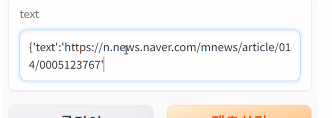

In [ ]:
import gradio as gr
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import WebBaseLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.chains.summarize import load_summarize_chain
from langchain.prompts import PromptTemplate


# 네이버 뉴스기사 주소
# url = 'https://n.news.naver.com/article/016/0002247281?sid=110'

# Gradio UI 함수 정의
def summarize_text(text):

  # 웹 문서 크롤링
  loader = WebBaseLoader(text)                                    # 추가 및 수정

  # 뉴스기사의 본문을 Chunk 단위로 쪼갬
  # length_function : 청크의 길이를 계산하는 방법,
  #                   기본적으로 문자 수만 세지만 여기서는 토큰 카운터를 전달하는 것이 중요
  text_splitter = CharacterTextSplitter(
      separator = '\n\n',
      chunk_size = 3000,
      chunk_overlap = 300,
      length_function = len,
      is_separator_regex = False,                                 # 추가 및 수정
  )

  # 웹사이트 내용 크롤링 후 Chunk 단위로 분할
  docs = loader.load_and_split(text_splitter)

  # 각 Chunk 단위의 템플릿
  template = '''다음의 내용을 한글로 요약해줘 :

  {text}
  '''

  # 전체 문서 (혹은 전체 Chunk)에 대한 지시(instruct) 정의
  combine_template = '''{text}

  요약의 결과는 다음의 형식으로 작성해줘 :
  제목 : 신문기사의 제목
  주요내용 : 한 줄로 요약 된 내용
  내용 : 주요내용을 불렛포인트 형식으로 작성
  '''

  # 템플릿 생성
  prompt = PromptTemplate(template = template, input_variables = ['text'])
  combine_prompt = PromptTemplate(template = combine_template, input_variables = ['text'])

  # LLM 객체 생성
  llm = ChatOpenAI(
      temperature = 0,
      model_name = 'gpt-3.5-turbo'
  )

  # 요약을 도와주는 load_summarize_chain
  chain = load_summarize_chain(
      llm,
      map_prompt = prompt,
      combine_prompt = combine_prompt,
      chain_type = 'map_reduce',
      verbose = False
  )

  # 여기에 특정 로직을 추가하여 text를 처리하는 코드를 작성
  result = chain.run(docs)  # Use the chain directly without 'process'
  return result

# Gradio UI 구성
iface = gr.Interface(fn = summarize_text, inputs = 'text', outputs = 'text')
iface.launch(debug = True)  # 웹 브라우저에서 열립니다.

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Keyboard interruption in main thread... closing server.


### 강사님 코드 - 일단 저장

In [ ]:
import gradio as gr
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import WebBaseLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.chains.summarize import load_summarize_chain
from langchain.prompts import PromptTemplate

# 네이버 뉴스기사 주소
#url = 'https://n.news.naver.com/article/016/0002247281?sid=110'

# Gradio UI 함수 정의
def summarize_text(text):
    # 웹 문서 크롤링
    loader = WebBaseLoader(text)

    # 뉴스기사의 본문을 Chunk 단위로 쪼갬
    text_splitter = CharacterTextSplitter(
        separator="\n\n",
        chunk_size=3000,
        chunk_overlap=300,
        length_function=len,
        is_separator_regex=False,
    )

    # 웹사이트 내용 크롤링 후 Chunk 단위로 분할
    docs = loader.load_and_split(text_splitter)

    # 각 Chunk 단위의 템플릿
    template = '''다음의 내용을 한글로 요약해줘:

    {text}
    '''

    # 전체 문서(혹은 전체 Chunk)에 대한 지시(instruct) 정의
    combine_template = '''{text}

    요약의 결과는 다음의 형식으로 작성해줘:
    제목: 신문기사의 제목
    주요내용: 한 줄로 요약된 내용
    내용: 주요내용을 불렛포인트 형식으로 작성
    '''

    # 템플릿 생성
    prompt = PromptTemplate(template=template, input_variables=['text'])
    combine_prompt = PromptTemplate(template=combine_template, input_variables=['text'])

    # LLM 객체 생성
    llm = ChatOpenAI(temperature=0,
                    model_name='gpt-3.5-turbo')

    # 요약을 도와주는 load_summarize_chain
    chain = load_summarize_chain(llm,
                                map_prompt=prompt,
                                combine_prompt=combine_prompt,
                                chain_type="map_reduce",
                                verbose=False)


    # 여기에 특정 로직을 추가하여 text를 처리하는 코드를 작성
    result = chain.run(docs)  # Use the chain directly without 'process'
    return result

# Gradio UI 구성
iface = gr.Interface(fn=summarize_text, inputs="text", outputs="text")
iface.launch(debug=True)  # 웹 브라우저에서 열립니다.

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Keyboard interruption in main thread... closing server.
